HW - 4
Group : Kaleb, Jordan, Kato.

Test your network with different numbers of layers and neurons and present the best result found.

Describe the problem that you have chosen.

1. If possible, provide a link (kaggle?) with details on the problem/dataset.
2. What is the input? What is the output?
3. What type of problem is this?
4. What are the features or attributes that you will use from the dataset.
5. What is your evaluation metric? Accuracy? RMSE? MAE? Recall/Precision?

We created a dataset based on online information from yahoo finance using an API called yfinance. The stock information used was for Amazon from 01/01/2019 - 01/01/2020 The dataset contains 7 features: Date, Open, High, Low, Close, Adj Close, and Volume. The inputs used were Open, High, and Low. The output is the Close price of the stock. The problem is to predict the Close price of the stock based on the input features. This is a regression problem. The evaluation metric is RMSE.

# Getting The Data


In [955]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas_datareader as data_reader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

yf.pdr_override()

In [956]:
# getting the data from yahoo finance

df = pdr.get_data_yahoo("AMZN", start="2017-01-01", end="2020-01-01")

[*********************100%%**********************]  1 of 1 completed


# Exploring The Data

#### a) How is the input structured (both an individual instance and the entire dataset) ?

The financial dataset has columns of Open, High, Low, Close, Volume, and Adj Close.  

Each row corresponds to a daily observation of stock prices for a given stock symbol.

Data types are numerical (float64 for prices, int64 for volume), and the dataset doesn't have any missing values.

We will not be using the Adj Close and Volume columns for to solve our problem.

In [1017]:
# Displaying the first 5 rows of the dataset
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


#### b) How is the output structure

The target variable 'Close' represents the closing price of the Amazon stock. 


In [988]:
print(df['Close'].describe())

count    754.000000
mean      73.339447
std       19.233734
min       37.683498
25%       50.159251
50%       80.275501
75%       89.387127
max      101.975502
Name: Close, dtype: float64


#### c) Will any features or output labels need to be encoded?

No the data from yahoo finance doesn't have any categorical features hence we won't need to encode.

#### d) If the input is an image, display a few sample images. If the input is a vector of attributes, provide relevant visualization(s), plot(s) or statistic(s) to understand the value ranges or possible correlations.

Our inputs aren't images, they are also not vectors of attributes.

#### e) Comment in your notebook about what you see from exploration of the datasets.

We see that the Amazon stock price is increasing gradually over the months and years. The closing price in on an upward trend.

# Preparing the Data

In [989]:
dates = df.index
date = pd.to_datetime(df.index)

In [990]:
dates

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None)

Text(0.5, 1.0, 'Amazon Stock Closing Price')

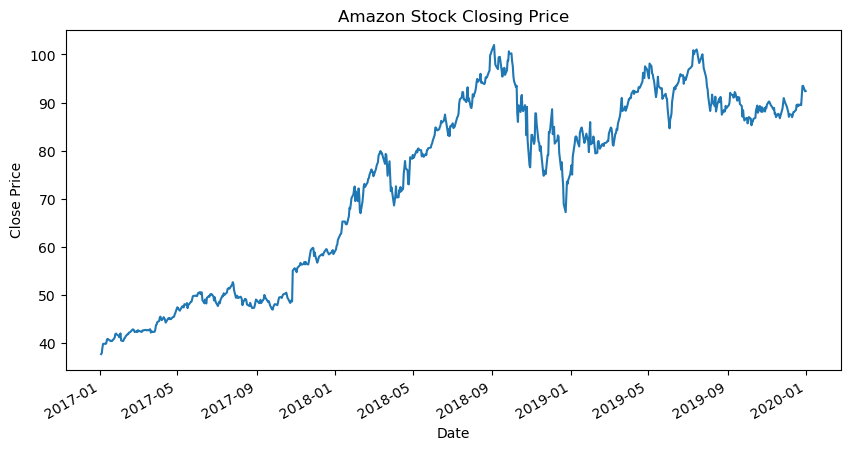

In [991]:
plt.figure(figsize=(10, 5))
df['Close'].plot()
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price')


#### a) Splitting the dataset

In [992]:
y = df[['Close']]
X = df[['Open', 'High', 'Low']]

print(y[:5])
print(X[:5])

                Close
Date                 
2017-01-03  37.683498
2017-01-04  37.859001
2017-01-05  39.022499
2017-01-06  39.799500
2017-01-09  39.846001
                 Open       High        Low
Date                                       
2017-01-03  37.896000  37.938000  37.384998
2017-01-04  37.919498  37.984001  37.709999
2017-01-05  38.077499  39.119999  38.013000
2017-01-06  39.118000  39.972000  38.924000
2017-01-09  39.900002  40.088501  39.588501


In [993]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%), and a temporary set (30%) which will be split into two for the validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

# Split the temporary set into validation (50%) and test (50%) sets, hence there will be a 15% validation, and 15 for testing.
x_val, x_test, y_val, y_test = train_test_split (
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=0
)

# Now we have X_train and y_train for training, x_val and y_val for validation, and  X_test and y_test for testing.


#### b) Checking for Missing Values

In [994]:
if df.isnull().any().any():
    print('There are missing values in the dataset')
else:
    print("There are zero missing values in the dataset")

There are zero missing values in the dataset


#### c) Encode any categorical features with One Hot Encoding

In this data there weren't any categorical features.

#### d) Create a pipeline for preparing your data. Use your pipeline to clean and prepare both training and testing sets before training and evaluating a model.

In [995]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numeric_features = ['Open', 'High', 'Low']

# Create a transformer for numerical features (just scaling in this case)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

# Combine transformers using ColumnTransformer (even though there's only one)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the full pipeline without a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on the training data (only for data preparation)
pipeline.fit(X_train)

# Transform the training data
X_train_transformed = pipeline.transform(X_train)

# Transform the validation set
X_val_transformed = pipeline.transform(x_val)

# Transform the test set
X_test_transformed = pipeline.transform(x_test)

# Select, Train and evaluate a model

#### a) Choose a non-neural net baseline method (e.g. Random forest, KNN, Logistic regression, ...).

In [1018]:
model1 = linear_model.LinearRegression()

#### b) Design an appropriate neural net for your problem.

In [1019]:
import tensorflow as tf

In [1020]:

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(1)
])


#### c) Train both models (baseline and neural net) on the entire training dataset. Remember to recreate your models before final training.

Non Neural Network Approach

In [999]:
# Non-Neural net baseline Method

model1.fit(X_train, y_train)

# Predict on the training set
y_pred1 = model1.predict(X_train)

# Evaluate the linear regression model on the training set
mse1 = mean_squared_error(y_train, y_pred1)
rmse1 = np.sqrt(mse1)
print(f'Linear Regression - Root Mean Squared Error on Training Set: {rmse1:.2f}')


Linear Regression - Root Mean Squared Error on Training Set: 0.42


Neural Network Approach

In [1000]:
model2.compile(
    loss='mean_squared_error', 
    optimizer=tf.keras.optimizers.legacy.Adam(0.001))

In [1001]:
history = model2.fit(
    X_train_transformed, y_train,epochs=200, batch_size=100, verbose=0, validation_data=(X_val_transformed, y_val))

# Predict on the training set
y_pred2 = model2.predict(X_train_transformed)

#Evaluate the neural network model on the training set
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
print(f'Neural Network - Root Mean Squared Error on Training Set: {rmse2:.2f}')


17/17 [==============================] - 0s 501us/step
Neural Network - Root Mean Squared Error on Training Set: 0.46


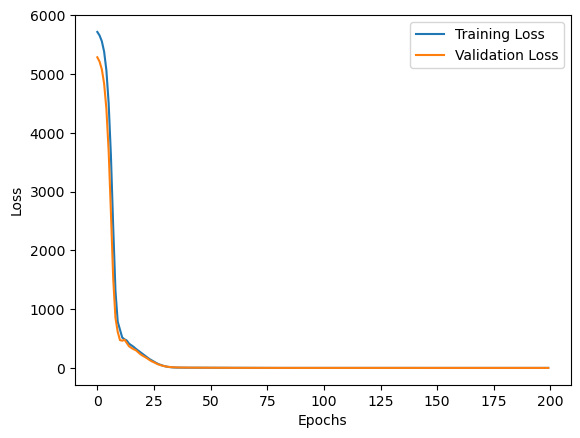

In [1003]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1004]:
y_pred1_test = model1.predict(x_test)

# Evaluate the linear regression model on the test set
mse1_test = mean_squared_error(y_test, y_pred1_test)
rmse1_test = np.sqrt(mse1_test)
print(f'Linear Regression - Root Mean Squared Error on Test Set: {rmse1_test:.2f}')

Linear Regression - Root Mean Squared Error on Test Set: 0.53


In [1005]:
# Predict on the test set
y_pred2_test = model2.predict(X_test_transformed)

# Evaluate the neural network model on the test set
mse2_test = mean_squared_error(y_test, y_pred2_test)
rmse2_test = np.sqrt(mse2_test)
print(f'Neural Network - Root Mean Squared Error on Test Set: {rmse2_test:.2f}')

4/4 [==============================] - 0s 1ms/step
Neural Network - Root Mean Squared Error on Test Set: 0.50


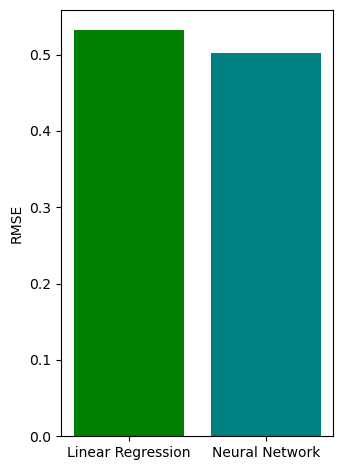

In [1016]:
plt.subplot(1, 2, 2)  # Subplot for RMSE
plt.bar(['Linear Regression', 'Neural Network'], [rmse1_test, rmse2_test], color=['green', 'teal'])
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [1007]:
model2.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_201 (Dense)           (None, 64)                256       
                                                                 
 dense_202 (Dense)           (None, 64)                4160      
                                                                 
 dense_203 (Dense)           (None, 64)                4160      
                                                                 
 dense_204 (Dense)           (None, 128)               8320      
                                                                 
 dense_205 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


#### e) Remark on the results. Which seemed to perform best? Was there a clear winner?

In our results we were able to graph the difference between the rmse for the linear regression and the rmse for the neural networks. The common trend so far, is that the linear regression has been doing better than the neural networks. But in this particular run we see that the neural networks does a little better than the linear regression. It wasn't a clear winner, it won by 0.3.   

# Future work Based on what you have learned from your results

###  what would you try next if you had more time? How would you try to improve these results.